## librerias usadas

In [ ]:
#NOTA JUPYTER NO UTILIZADO
#SE INTENTO UTILIZAR DUMMIES PARA CREAR MUCHAS COLUMNAS Y PROBAR, NO SALE BIEN, MIRAR SUBMISSION2.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import country_converter as coco
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, recall_score, precision_recall_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data exploration

In [3]:
#pues nada, vamos a empezar. Primero abrire el csv y hechare un vistazo
train = pd.read_csv("../Dataframes/train.csv", sep=",")
train

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [56]:
#Bien, no tenemos nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [57]:
train.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873
std,380.313813,384.873846,1.411744,714.597741
min,0.000000,1.000000,10.100000,174.000000
25%,319.750000,330.500000,14.000000,589.000000
50%,636.500000,673.500000,15.600000,949.000000
75%,980.250000,998.500000,15.600000,1458.500000
max,1302.000000,1320.000000,18.400000,6099.000000


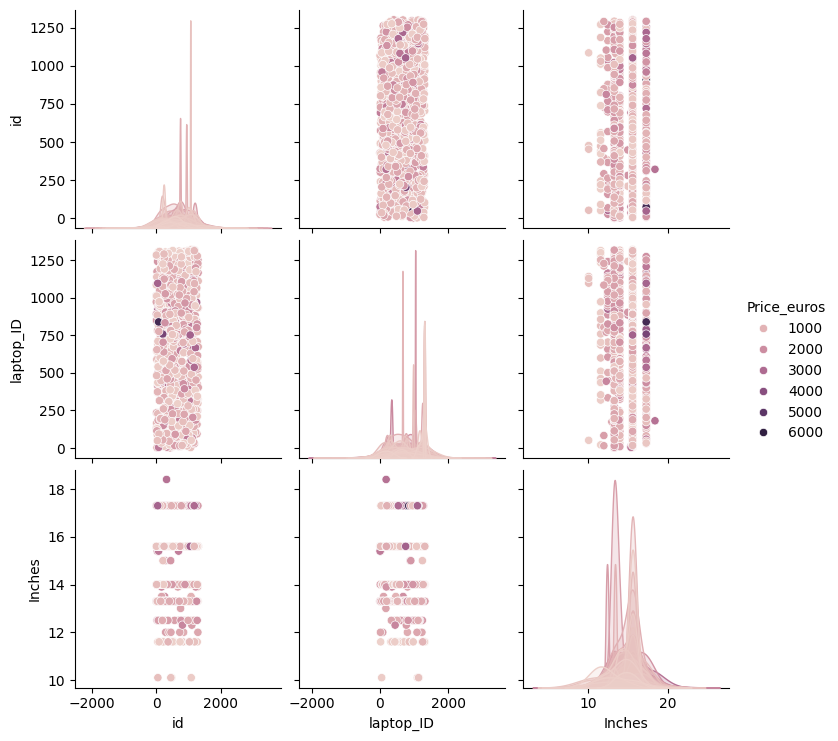

In [58]:
sns.pairplot(train, hue="Price_euros");

In [59]:
#sns.heatmap(train.corr(), annot=True, cmap="coolwarm")

In [60]:
#no me aportan ningun dato interesante, voy a manipular la DF.
#Posiblemente se deba a los componentes, ahora mismo no voy a poder ver nada.

## DATA PROCESSING

In [61]:
#Empezemos separando las columnas de texto segun su contenido.

In [62]:
Company = []
for topic in train['Company']:
    for palabra in topic.split(" "):
        Company.append(palabra.lower())

Typename = []
for topic in train['TypeName']:
    for palabra in topic.split(" "):
        Typename.append(palabra.lower())

Cpu = []
for topic in train['Cpu']:
    for palabra in topic.split(" "):
        Cpu.append(palabra.lower())

Ram = []
for topic in train['Ram']:
    for palabra in topic.split(" "):
        Ram.append(palabra.lower())

Memory = []
for topic in train['Memory']:
    for palabra in topic.split(" "):
        Memory.append(palabra.lower())

Gpu = []
for topic in train['Gpu']:
    for palabra in topic.split(" "):
        Gpu.append(palabra.lower())

OpSys = []
for topic in train['OpSys']:
    for palabra in topic.split(" "):
        OpSys.append(palabra.lower())
        
#Weight siguen siendo datos, por si acaso vamos a mirarla, aunque no la incluire.

Weight = []
for topic in train['Weight']:
    for palabra in topic.split(" "):
        Weight.append(palabra.lower())

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [64]:
print(Typename)
#2 en 1? segun la DF es el nombre de algunos PC, vamos a ver los unicos en el df.

['notebook', 'notebook', 'notebook', 'gaming', 'ultrabook', '2', 'in', '1', 'convertible', 'notebook', 'gaming', 'ultrabook', 'gaming', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'ultrabook', '2', 'in', '1', 'convertible', 'notebook', 'notebook', 'notebook', '2', 'in', '1', 'convertible', 'notebook', 'netbook', 'gaming', 'workstation', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'gaming', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'ultrabook', 'gaming', '2', 'in', '1', 'convertible', 'ultrabook', 'notebook', '2', 'in', '1', 'convertible', 'notebook', 'notebook', 'notebook', 'ultrabook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'ultrabook', 'ultrabook', 'notebook', 'notebook', 'workstation', 'notebook', 'notebook', 'notebook', 'ultrabook', 'gaming', 'netbook', 'ultrabook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'notebook', 'gaming', 'notebook', 'gamin

In [65]:
train["TypeName"].unique()
#2 in 1 convertible, esta bien saberlo.

array(['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Netbook',
       'Workstation'], dtype=object)

In [66]:
pd.Series(Company).value_counts().sort_values(ascending=False)


lenovo       208
dell         207
hp           189
asus         108
acer          75
toshiba       37
msi           34
apple         17
mediacom       7
samsung        6
razer          6
fujitsu        3
microsoft      3
vero           3
xiaomi         3
google         2
chuwi          2
lg             1
huawei         1
Name: count, dtype: int64

In [67]:
pd.Series(Typename).value_counts().sort_values(ascending=False)


notebook       522
gaming         138
ultrabook      135
2               85
in              85
1               85
convertible     85
workstation     18
netbook         14
Name: count, dtype: int64

In [68]:
#pd.Series(Screen).value_counts().sort_values(ascending=False)


In [69]:
pd.Series(Cpu).value_counts().sort_values(ascending=False)

intel      872
core       856
i7         351
i5         305
2.5ghz     206
          ... 
1.92ghz      1
9700p        1
n3700        1
a6-9220      1
9000         1
Name: count, Length: 128, dtype: int64

In [70]:
pd.Series(Ram).value_counts().sort_values(ascending=False)

8gb     434
4gb     274
16gb    125
6gb      32
2gb      16
12gb     15
32gb     14
24gb      2
Name: count, dtype: int64

In [71]:
pd.Series(Gpu).value_counts().sort_values(ascending=False).head(15)

graphics    530
intel       522
hd          465
nvidia      268
geforce     247
620         246
gtx         158
520         150
amd         122
radeon      117
1050         64
uhd          45
r5           40
940mx        32
1060         31
Name: count, dtype: int64

In [72]:
pd.Series(OpSys).value_counts().sort_values(ascending=False)

windows    782
10         750
os          70
linux       47
no          44
7           32
chrome      20
macos       11
mac          6
x            6
s            4
android      2
Name: count, dtype: int64

In [73]:
pd.Series(Weight).value_counts().sort_values(ascending=False)

2.2kg     86
2.1kg     40
2.3kg     35
2.4kg     31
2kg       30
          ..
1.08kg     1
1.41kg     1
4kg        1
2.72kg     1
1.79kg     1
Name: count, Length: 158, dtype: int64

In [74]:
#No voy a negar es complicado, todos los componentes influyen en el precio, no puedo saltarme ninguno.

In [75]:
#ahora lo que quiero es guardar todo el texto de cada fila.
def guardar_texto(frame):
        """for i in frame['Company']:
                Company.append(i)"""

        """for i in frame['Product']:
                Product.append(i)"""

        """for i in frame['TypeName']:
                Typename.append(i)"""
        
        """for i in frame['ScreenResolution']:
                Screen.append(i)"""
        
        for i in frame['Cpu']:
                Cpu.append(i)
        
        for i in frame['Memory']:
                Memory.append(i)
       
        for i in frame['Gpu']:
                Gpu.append(i)
       
        """for i in train['OpSys']:
                OpSys.append(i)"""


In [76]:
#Company = []
#Product = []
#Typename = []
#Screen = []
Cpu = []
Memory = []
Gpu = []
#OpSys = []
guardar_texto(train)

In [77]:
#Tenemos el problema de que tendran valores repetidos, vamos a quedarnos solo con los valores unicos.

def unico(lista):
    lista_unica = []
    for i in lista:
        if i not in lista_unica:
            lista_unica.append(i)
    return lista_unica



In [78]:
#Listo, vamos a hacerlo con todas.
#Company = unico(Company)
#Product = unico(Product)
#Typename = unico(Typename)
#Screen = unico(Screen)
Cpu = unico(Cpu)
Memory = unico(Memory)
Gpu = unico(Gpu)
OpSys = unico(OpSys)

In [79]:
"""print(Company)
print(Product)
print(OpSys)
print(Typename)
print(Screen)"""
print(Cpu)
print(Ram)
print(Memory)
print(Gpu)


#parece estar mejor ya.
#vamos a tener un monton de columnas, pero de esta forma tendremos un modelo bien entrenado.
#al fin y al cabo, debemos de darle todo lo necesario para, segun los componentes, calcular el precio.

['Intel Core i7 7500U 2.7GHz', 'Intel Pentium Quad Core N4200 1.1GHz', 'Intel Core i5 6200U 2.3GHz', 'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i5 6300U 2.4GHz', 'Intel Core i3 6006U 2GHz', 'Intel Pentium Quad Core N3710 1.6GHz', 'Intel Core i7 8550U 1.8GHz', 'AMD A9-Series A9-9420 3GHz', 'Intel Pentium Dual Core 4405U 2.1GHz', 'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7200U 2.5GHz', 'Intel Xeon E3-1535M v6 3.1GHz', 'Intel Atom x5-Z8550 1.44GHz', 'AMD A10-Series 9620P 2.5GHz', 'Intel Core i5 7300U 2.6GHz', 'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Core i7 6500U 2.5GHz', 'Intel Core i3 6006U 2.0GHz', 'Intel Celeron Dual Core 3205U 1.5GHz', 'AMD A12-Series 9720P 3.6GHz', 'Intel Celeron Dual Core N3050 1.6GHz', 'Intel Core i3 7130U 2.7GHz', 'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 7200U 2.7GHz', 'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i7 2.2GHz', 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i7 6600U 2.6GHz', 'Intel Atom x5-Z8350 1.44GHz

In [80]:
#Para mantener la original intacta, creamos otra variable que si manipularemos.

df = pd.read_csv("train.csv", sep=",")

In [81]:
#Para la memoria Ram, vamos a quitarle GB y pasarla a valor numerico.

df["Ram"] = df["Ram"].str.replace("GB","").astype("int64")

#como todas son formato 64, la paso igual a int64

In [82]:
df.dtypes

id                    int64
laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [83]:
#Que fea se ve la lista de Product... vamos a quitar esos ) sobrantes

def arreglar_product(lista):
    for i,j in enumerate(lista):
        #lo que hare, es quitar todos los ")" con replace.
        #para no quitar, los parentesis buenos, que revise ademas, si contiene un "(", si es asi, que ponga otro ")" al final.
        if j.endswith(")))))"):
            j = j[:-5]
            lista[i] = j

    #ahora tenemos el problema que algunos no estan cerrados, vamos arreglarlo aqui mismo

    for i,j in enumerate(lista):

        #para no quitar, los parentesis buenos, que revise ademas, si contiene un "(", si es asi, que ponga otro ")" al
        for x in j:

            if x == "(" and not(j.endswith(")")):
                lista[i] = j + ")"
    
    return lista


In [84]:
#Product = arreglar_product(Product)
#y ya lo tenemos arreglado.

In [85]:
#vamos al lio, vamos a hacer una funcion para esto.

def crear_columnas(data, lista, columna):
    df_temporal = pd.DataFrame()
    for i in lista:
        df_temporal[i] = np.where(data[columna].str.contains(i), 1, 0)

    return df_temporal


In [86]:
df.dtypes

id                    int64
laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [87]:
#Lo que hare es, meterlas en una dataframe nueva y luego usamos concant con axis=1
"""df_company = crear_columnas(df, Company, "Company")
df_product = crear_columnas(df, Product, "Product")
df_typename = crear_columnas(df, Typename, "TypeName")
df_Screen = crear_columnas(df, Screen, "ScreenResolution")"""
df_Cpu = crear_columnas(df, Cpu, "Cpu")
df_memory = crear_columnas(df, Memory, "Memory")
df_Gpu = crear_columnas(df, Gpu, "Gpu")
#df_OpSys = crear_columnas(df, OpSys, "OpSys")

#Me preocupan los warning, pero todo parece estar bien.
#Soy consciente de que esto no deberia aparecer, pero no se como deberia hacer para resolverlo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8872\3264359465.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temporal[i] = np.where(data[columna].str.contains(i), 1, 0)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8872\3264359465.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temporal[i] = np.where(data[columna].str.contains(i), 1, 0)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8872\3264359465.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

In [88]:
df_final = pd.concat([df,  df_Cpu, df_memory, df_Gpu, ], axis=1)

In [89]:
#quitamos id y id portatil, no son datos necesarios, tambien quitaremos los textos, ya que no podremos usarlos en el entrenamiento.

df_final = df_final.drop(["id", "laptop_ID", "Company", "Product", "TypeName", "ScreenResolution","Cpu", "Memory", "Gpu","OpSys", "Weight"], axis=1)

In [90]:
df_final

,Inches,Ram,Price_euros,Intel Core i7 7500U 2.7GHz,Intel Pentium Quad Core N4200 1.1GHz,Intel Core i5 6200U 2.3GHz,Intel Core i7 7700HQ 2.8GHz,Intel Core i5 6300U 2.4GHz,Intel Core i3 6006U 2GHz,Intel Pentium Quad Core N3710 1.6GHz,...,Intel Iris Graphics 550,Nvidia GTX 980 SLI,AMD R4 Graphics,Nvidia GeForce GTX1050 Ti,Intel Iris Graphics 540,AMD FirePro W6150M,AMD Radeon R7 Graphics,AMD Radeon R7,Intel Graphics 620,Nvidia Quadro M520M
0,15.6,8,749.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15.6,4,449.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.3,8,1460.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.6,16,2868.99,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.5,8,1713.37,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,11.6,4,389.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,13.3,4,1195.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,15.6,8,449.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,14.0,8,1775.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#vale pues ya la tenemos, hora de entrenarla.

In [92]:
test = pd.read_csv("../DataFrames/test.csv", sep=",")

In [93]:
test

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
388,1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg


In [94]:
#Tenemos que dejar test adaptado, como hemos hecho con train.
#repetire todos los pasos en la siguiente celda.

In [95]:
#Aqui la primera parte
guardar_texto(test)
#Company = []
Cpu = []
Memory = []
Gpu = []
#OpSys = []
guardar_texto(test)
#Product = arreglar_product(Product)
test["Ram"] = test["Ram"].str.replace("GB","").astype("int64")

In [96]:
#aqui la segunda
#Product2 = arreglar_product(Product)
"""df_company2 = crear_columnas(test, Company, "Company")
df_product2 = crear_columnas(test, Product, "Product")
df_typename2 = crear_columnas(test, Typename, "TypeName")"""
df_Cpu2 = crear_columnas(test, Cpu, "Cpu")
df_memory2 = crear_columnas(test, Memory, "Memory")
df_Gpu2 = crear_columnas(test, Gpu, "Gpu")
#df_OpSys2 = crear_columnas(test, OpSys, "OpSys")
test_final = pd.concat([test, df_Cpu2, df_memory2, df_Gpu2], axis=1)
test_final = test_final.drop(["id", "laptop_ID", "Company", "Product", "TypeName", "ScreenResolution","Cpu", "Memory", "Gpu","OpSys", "Weight"], axis=1)

In [97]:
test_final

,Inches,Ram,Intel Core i7 7500U 2.7GHz,AMD A12-Series 9720P 2.7GHz,Intel Core i3 6006U 2.0GHz,Intel Core i5 6200U 2.3GHz,Intel Core i5 7200U 2.5GHz,Intel Core i7 8550U 1.8GHz,Intel Core i7 7700HQ 2.8GHz,Intel Core i7 6820HK 2.7GHz,...,AMD Radeon R3,Nvidia GeForce GT 940MX,AMD FirePro W5130M,Nvidia GeForce GTX1080,Intel HD Graphics 630,Nvidia GeForce 150MX,Intel HD Graphics 505,AMD Radeon R5 M420X,ARM Mali T860 MP4,Nvidia GeForce 920M
0,13.3,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.6,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.3,8,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,15.6,8,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
387,15.6,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,15.6,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,15.6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
#no todas las columnas de train estaran en test, y necesitamos que sean las mismas.

columnas = df_final.columns.intersection(test_final.columns)
df_final = df_final[columnas]
columnas = test_final.columns.intersection(df_final.columns)
test_final = test_final[columnas]

In [99]:
#no estan en el mismo orden.

df_final.reindex(sorted(df_final.columns), axis=1)
test_final.reindex(sorted(test_final.columns), axis=1)

,1.0TB Hybrid,128GB Flash Storage,128GB SSD,128GB SSD + 1TB HDD,128GB SSD + 2TB HDD,16GB Flash Storage,1TB HDD,1TB SSD,256GB Flash Storage,256GB SSD,...,Nvidia GeForce GTX 980M,Nvidia GeForce MX130,Nvidia GeForce MX150,Nvidia Quadro M1000M,Nvidia Quadro M1200,Nvidia Quadro M2200,Nvidia Quadro M2200M,Nvidia Quadro M520M,Nvidia Quadro M620,Ram
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [100]:
#AQUI DEJO DEFINIDA X e y.

X = df_final[columnas]
y = df["Price_euros"]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [102]:
#Probaremos primero con una regresion lineal.

lr = LinearRegression()
lr.fit(X_train, y_train)
X_test = test_final

In [107]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (912, 131)
Train features shape: (729, 131)
Train target shape: (729,)
Test features shape: (391, 131)
Test target shape: (183,)


In [104]:
predictions = lr.predict(X_test)
len(predictions)

391

In [105]:
#print('MAE:', mean_absolute_error(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [183, 391]

In [106]:
submission = pd.DataFrame({'id': test['id'], 'Price_euros':predictions})
submission.to_csv('../DataFrames/submission.csv', index=False)

In [ ]:
test['id']

0       181
1       708
2       862
3      1064
4       702
       ... 
386    1281
387     524
388    1015
389    1236
390    1036
Name: id, Length: 391, dtype: int64